In [1]:
#Initialise plots, directory and image saving

#Import numpy, pandas and os
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib as mpl

mpl.style.use('bmh')

#to ensure consistent results over different iterations, a random seed is set
np.random.seed(65)

#for plots
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#for saving plots as images
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
#Import the health score data into a pandas DataFrame and display the first 5 and last 5 values
healthScores = pd.read_csv("HealthScores.csv")
healthScores.head()

,Age,Sex,Weight in lbs,Height in Inch,IQ,Units of alcohol per day,Cigarettes per day,Active,Health Score (high is good)
0,32,Female,101,67,110,0,0,Inactive,251
1,47,Female,138,67,84,2,0,Active,193
2,25,Male,166,73,106,2,5,Inactive,167
3,75,Male,184,73,99,2,0,Inactive,93
4,72,Female,105,65,99,2,0,Active,150


In [3]:
healthScores.tail()

,Age,Sex,Weight in lbs,Height in Inch,IQ,Units of alcohol per day,Cigarettes per day,Active,Health Score (high is good)
4994,56,Female,77,64,98,3,0,Inactive,133
4995,38,Male,151,70,103,5,0,Inactive,100
4996,45,Female,135,62,99,0,0,Very Active,258
4997,72,Female,130,62,102,0,0,Inactive,125
4998,26,Female,142,68,99,0,0,Very Active,378


In [4]:
#Add a column (feature) to the health score data set for BMI (BMI is a value calculated from weight and height)

#BMI = weight (in kg) / (height (in m))^2
#See https://www.nhs.uk/chq/Pages/how-can-i-work-out-my-bmi.aspx

#copy healthScores data frame into a temporary data frame
temp = healthScores.copy()

#convert weights from lbs to kg
temp['Weight in kg'] = temp['Weight  in lbs'] * 0.453592

#convert heights from inches to metres
temp['Height in m'] = temp['Height in Inch'] * 0.0254

#calculate BMIs and store them in a new column titled "BMI"
healthScores['BMI'] = temp['Weight in kg'] / (temp['Height in m'] **2)

healthScores.describe()

,Age,Weight in lbs,Height in Inch,IQ,Units of alcohol per day,Cigarettes per day,Health Score (high is good),BMI
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,48.881376,142.273655,68.215043,100.056611,0.988198,4.001000,170.024805,21.482319
std,18.209711,25.283687,4.228134,6.016367,1.003226,9.587125,70.025921,3.216895
min,18.000000,77.000000,56.000000,79.000000,0.000000,0.000000,59.000000,10.878671
25%,33.000000,123.000000,65.000000,96.000000,0.000000,0.000000,117.000000,19.197431
50%,49.000000,139.000000,68.000000,100.000000,1.000000,0.000000,156.000000,21.433951
75%,65.000000,163.000000,71.000000,104.000000,2.000000,0.000000,207.000000,23.630930
max,80.000000,217.000000,83.000000,122.000000,7.000000,40.000000,505.000000,33.527565


In [5]:
healthScores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 10 columns):
Age                            4999 non-null int64
Sex                            4999 non-null object
Weight  in lbs                 4999 non-null int64
Height in Inch                 4999 non-null int64
IQ                             4999 non-null int64
Units of alcohol per day       4999 non-null int64
Cigarettes per day             4999 non-null int64
Active                         4999 non-null object
Health Score (high is good)    4999 non-null int64
BMI                            4999 non-null float64
dtypes: float64(1), int64(7), object(2)
memory usage: 390.6+ KB


In [6]:
corr_matrix = healthScores.corr()
corr_matrix

,Age,Weight in lbs,Height in Inch,IQ,Units of alcohol per day,Cigarettes per day,Health Score (high is good),BMI
Age,1.000000,0.003304,0.012862,0.017166,-0.014293,-0.021688,-0.618599,-0.005527
Weight in lbs,0.003304,1.000000,0.562227,-0.000068,-0.022795,0.006354,-0.305783,0.711237
Height in Inch,0.012862,0.562227,1.000000,0.012680,-0.008788,0.024427,-0.184638,-0.175082
IQ,0.017166,-0.000068,0.012680,1.000000,-0.000751,-0.002714,-0.022800,-0.012733
Units of alcohol per day,-0.014293,-0.022795,-0.008788,-0.000751,1.000000,0.012816,-0.086539,-0.016713
Cigarettes per day,-0.021688,0.006354,0.024427,-0.002714,0.012816,1.000000,-0.241042,-0.013178
Health Score (high is good),-0.618599,-0.305783,-0.184638,-0.022800,-0.086539,-0.241042,1.000000,-0.206545
BMI,-0.005527,0.711237,-0.175082,-0.012733,-0.016713,-0.013178,-0.206545,1.000000


In [7]:
corr_matrix["Health Score (high is good)"].sort_values(ascending =False)

Health Score (high is good)    1.000000
IQ                            -0.022800
Units of alcohol per day      -0.086539
Height in Inch                -0.184638
BMI                           -0.206545
Cigarettes per day            -0.241042
Weight  in lbs                -0.305783
Age                           -0.618599
Name: Health Score (high is good), dtype: float64

Saving figure attribute_histogram_plots


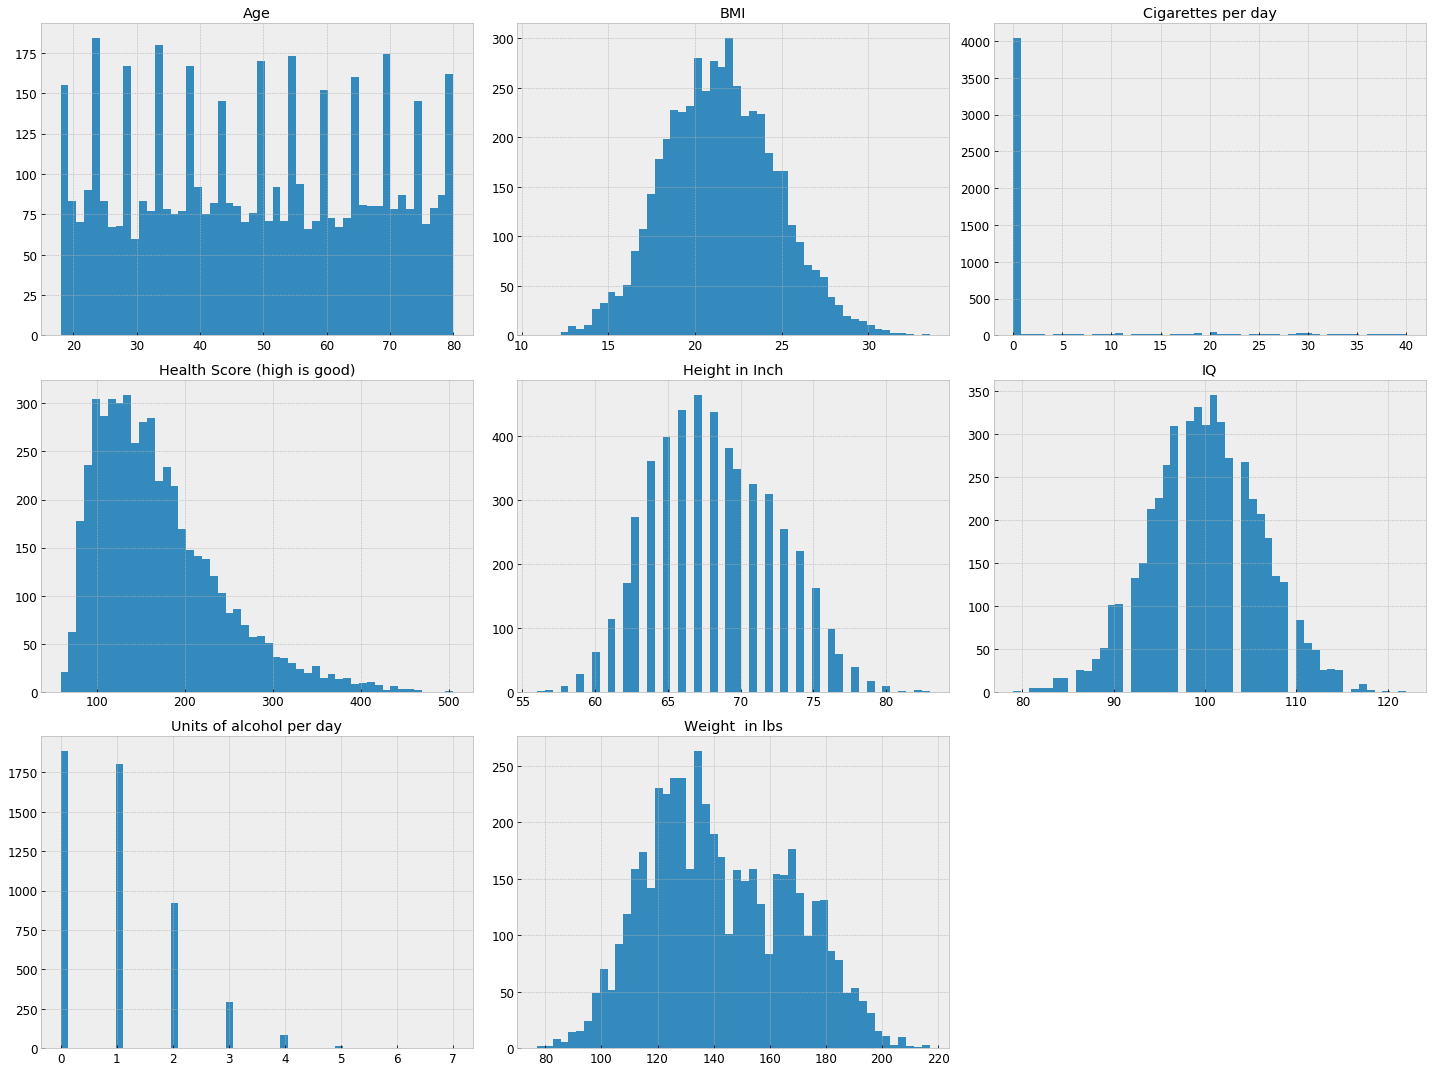

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
healthScores.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [9]:
#1.Are there any significant differences between different segments of the population in terms of their
#lifestyle choices (for example, male and female, different age groups)? 

corr_matrix["Age"].sort_values(ascending =False)

Age                            1.000000
IQ                             0.017166
Height in Inch                 0.012862
Weight  in lbs                 0.003304
BMI                           -0.005527
Units of alcohol per day      -0.014293
Cigarettes per day            -0.021688
Health Score (high is good)   -0.618599
Name: Age, dtype: float64

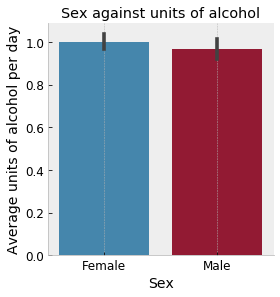

In [10]:
#Sex against units of alcohol drunk
sns.factorplot("Sex", "Units of alcohol per day", data=healthScores, kind="bar")

plt.title('Sex against units of alcohol')
plt.ylabel('Average units of alcohol per day')
plt.grid()

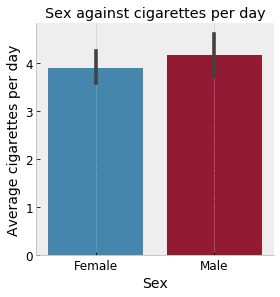

In [11]:
#Sex against cigarettes per day
sns.factorplot("Sex", "Cigarettes per day", data=healthScores, kind="bar")

plt.title('Sex against cigarettes per day')
plt.ylabel('Average cigarettes per day')
plt.grid()

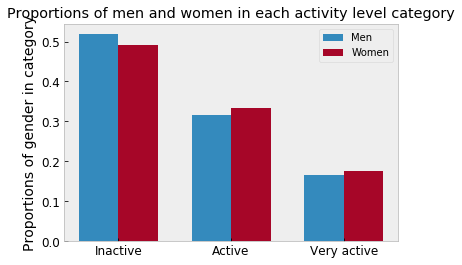

In [12]:
#Sex against activity level

males = healthScores.loc[healthScores['Sex'] == 'Male']
females = healthScores.loc[healthScores['Sex'] == 'Female']

#Proportions of men and women who fall into each activity level
maleCounts = males['Active'].value_counts(normalize=True)
femaleCounts = females['Active'].value_counts(normalize=True)

fig, subplot = plt.subplots()

ind = np.arange(3)
p1 = subplot.bar(ind, maleCounts, 0.35, bottom=0)
p2 = subplot.bar(ind + 0.35, femaleCounts, 0.35, bottom=0)

subplot.set_title('Proportions of men and women in each activity level category')
subplot.grid()
subplot.set_xticks(ind + 0.35 / 2)
subplot.set_xticklabels(('Inactive', 'Active', 'Very active'))
subplot.set_ylabel('Proportions of gender in category')

subplot.legend((p1[0], p2[0]), ('Men', 'Women'))
subplot.autoscale_view()

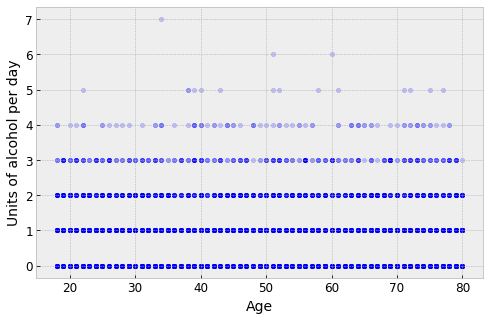

In [27]:
#Age against units of alcohol drunk

healthScores.plot(kind='scatter', x='Age', y='Units of alcohol per day', alpha=0.2, figsize=(8, 5))

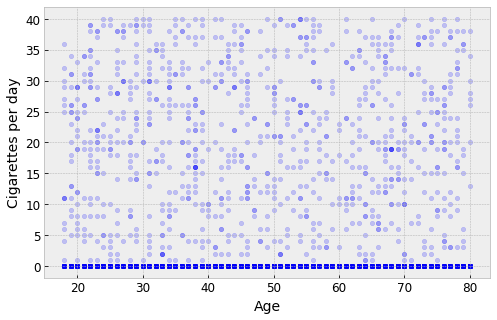

In [28]:
#Age against cigarettes per day

healthScores.plot(kind='scatter', x='Age', y='Cigarettes per day', alpha=0.2, figsize=(8, 5))

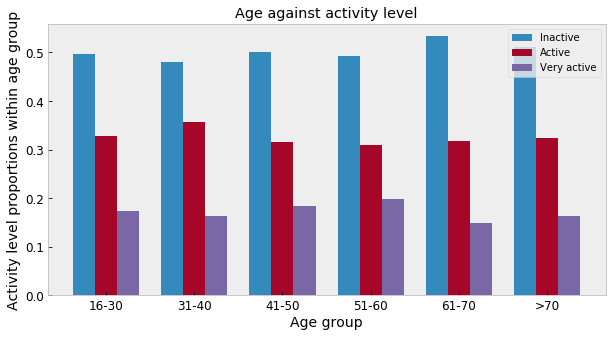

In [15]:
#Age against activity level
#Age groups are 16-30, 31-40, 41-50, 51-60, 61-70, 71-80

groups = []
groups.append(healthScores.loc[(healthScores['Age'] >= 16) & (healthScores['Age'] <= 30)])
groups.append(healthScores.loc[(healthScores['Age'] > 30) & (healthScores['Age'] <= 40)])
groups.append(healthScores.loc[(healthScores['Age'] > 40) & (healthScores['Age'] <= 50)])
groups.append(healthScores.loc[(healthScores['Age'] > 50) & (healthScores['Age'] <= 60)])
groups.append(healthScores.loc[(healthScores['Age'] > 60) & (healthScores['Age'] <= 70)])
groups.append(healthScores.loc[healthScores['Age'] > 70])

counts = []
for i in range(0, 6):
    counts.append(groups[i]['Active'].value_counts(normalize=True))

inactiveSubplot = []
for i in range(0, 6):
    inactiveSubplot.append(counts[i]['Inactive'])
    
activeSubplot = []
for i in range(0, 6):
    activeSubplot.append(counts[i]['Active'])
    
veryActiveSubplot = []
for i in range(0, 6):
    veryActiveSubplot.append(counts[i]['Very Active'])
    
fig, subplot = plt.subplots(figsize=(10, 5))

ind = np.arange(6)
inactive = subplot.bar(ind, inactiveSubplot, 0.25, bottom=0)
active = subplot.bar(ind + 0.25, activeSubplot, 0.25, bottom=0)
veryActive = subplot.bar(ind + 0.5, veryActiveSubplot, 0.25, bottom=0)

subplot.set_title('Age against activity level')
subplot.set_xlabel('Age group')
subplot.set_xticks(ind + 0.25)
subplot.set_xticklabels(('16-30', '31-40', '41-50', '51-60', '61-70', '>70'))
subplot.set_ylabel('Activity level proportions within age group')
subplot.grid()

subplot.legend((inactive[0], active[0], veryActive[0]), ('Inactive', 'Active', 'Very active'))
subplot.autoscale_view()

In [16]:
#Which individual characteristics and lifestyle choices impact a person’s health score (and to what extent)?

corrValues = corr_matrix['Health Score (high is good)'].sort_values(ascending=False)
corrValues

Health Score (high is good)    1.000000
IQ                            -0.022800
Units of alcohol per day      -0.086539
Height in Inch                -0.184638
BMI                           -0.206545
Cigarettes per day            -0.241042
Weight  in lbs                -0.305783
Age                           -0.618599
Name: Health Score (high is good), dtype: float64

Text(0,0.5,'Correlation')

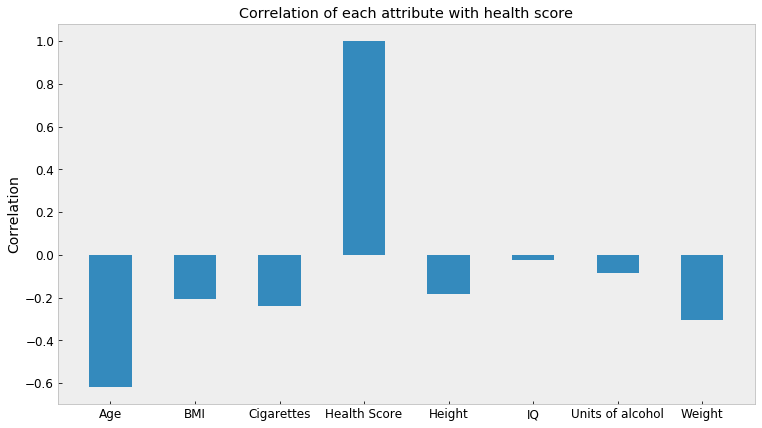

In [33]:
plt.figure(figsize=(12.5, 7))
plt.grid()
plt.bar(x=['Health Score',
           'IQ',
           'Units of alcohol',
           'Height',
           'BMI',
           'Cigarettes',
           'Weight',
           'Age'],
        height=corrValues,
        width=0.5)
plt.title('Correlation of each attribute with health score')
plt.ylabel('Correlation')

In [18]:
#What would be the impact on the overall population (in terms of health score) if nobody consumed alcohol and did not smoke?

#create a copy of healthScores with all smokers removed
noSmokersOrDrinkers = healthScores.copy()
noSmokersOrDrinkers = noSmokersOrDrinkers.loc[noSmokersOrDrinkers['Units of alcohol per day'] == 0]
noSmokersOrDrinkers = noSmokersOrDrinkers.loc[noSmokersOrDrinkers['Cigarettes per day'] == 0]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001985C5A4278>]],
      dtype=object)

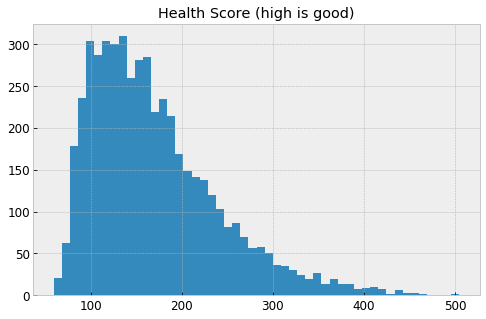

In [19]:
healthScores.hist(bins=50, column='Health Score (high is good)', figsize=(8,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001985C8AD0B8>]],
      dtype=object)

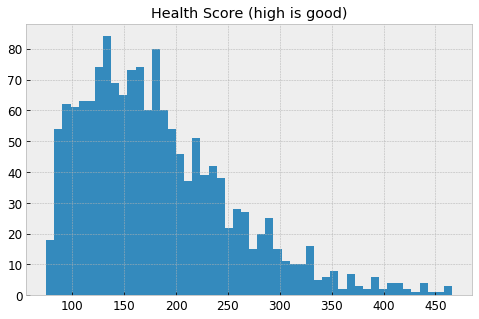

In [20]:
noSmokersOrDrinkers.hist(bins=50, column='Health Score (high is good)', figsize=(8,5))

In [21]:
healthScores['Health Score (high is good)'].mean()

170.02480496099218

In [22]:
noSmokersOrDrinkers['Health Score (high is good)'].mean()

183.0098231827112

In [23]:
#Find proportions of people in each group who have health scores over 200. The most commonly occurring health scores lie between 100 and 200,
#so this helps show how many people have above-average scores in both the overall population, and the population minus smokers and drinkers.

healthScoresUnder200 = healthScores.loc[healthScores['Health Score (high is good)'] <= 200]
healthScoresOver200 = healthScores.loc[healthScores['Health Score (high is good)'] > 200]

NSOD_Under200 = noSmokersOrDrinkers.loc[noSmokersOrDrinkers['Health Score (high is good)'] <= 200]
NSOD_Over200 = noSmokersOrDrinkers.loc[noSmokersOrDrinkers['Health Score (high is good)'] > 200]

HS_Under200Total = healthScoresUnder200['Health Score (high is good)'].sum()
HS_Over200Total = healthScoresOver200['Health Score (high is good)'].sum()

NSOD_Under200Total = NSOD_Under200['Health Score (high is good)'].sum()
NSOD_Over200Total = NSOD_Over200['Health Score (high is good)'].sum()

HS_PropOver200 = HS_Over200Total / (HS_Under200Total + HS_Over200Total)
HS_PropOver200

0.41905914908336217

In [24]:
NSOD_PropOver200 = NSOD_Over200Total / (NSOD_Under200Total + NSOD_Over200Total)
NSOD_PropOver200

0.4879659051872209